In [1]:
from utilities import *

In [2]:
model = models.vgg19(pretrained=True)
model = model.cuda()
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [68]:
img_path = 'images/scenery_.jpg'

In [69]:

img = Image.open(img_path)
orig_size = np.array(img.size)
new_size = np.array(img.size)*0.5
img = img.resize(new_size.astype(int))
layer = list(model.features.modules() )[33]

In [70]:
type(layer)

torch.nn.modules.conv.Conv2d

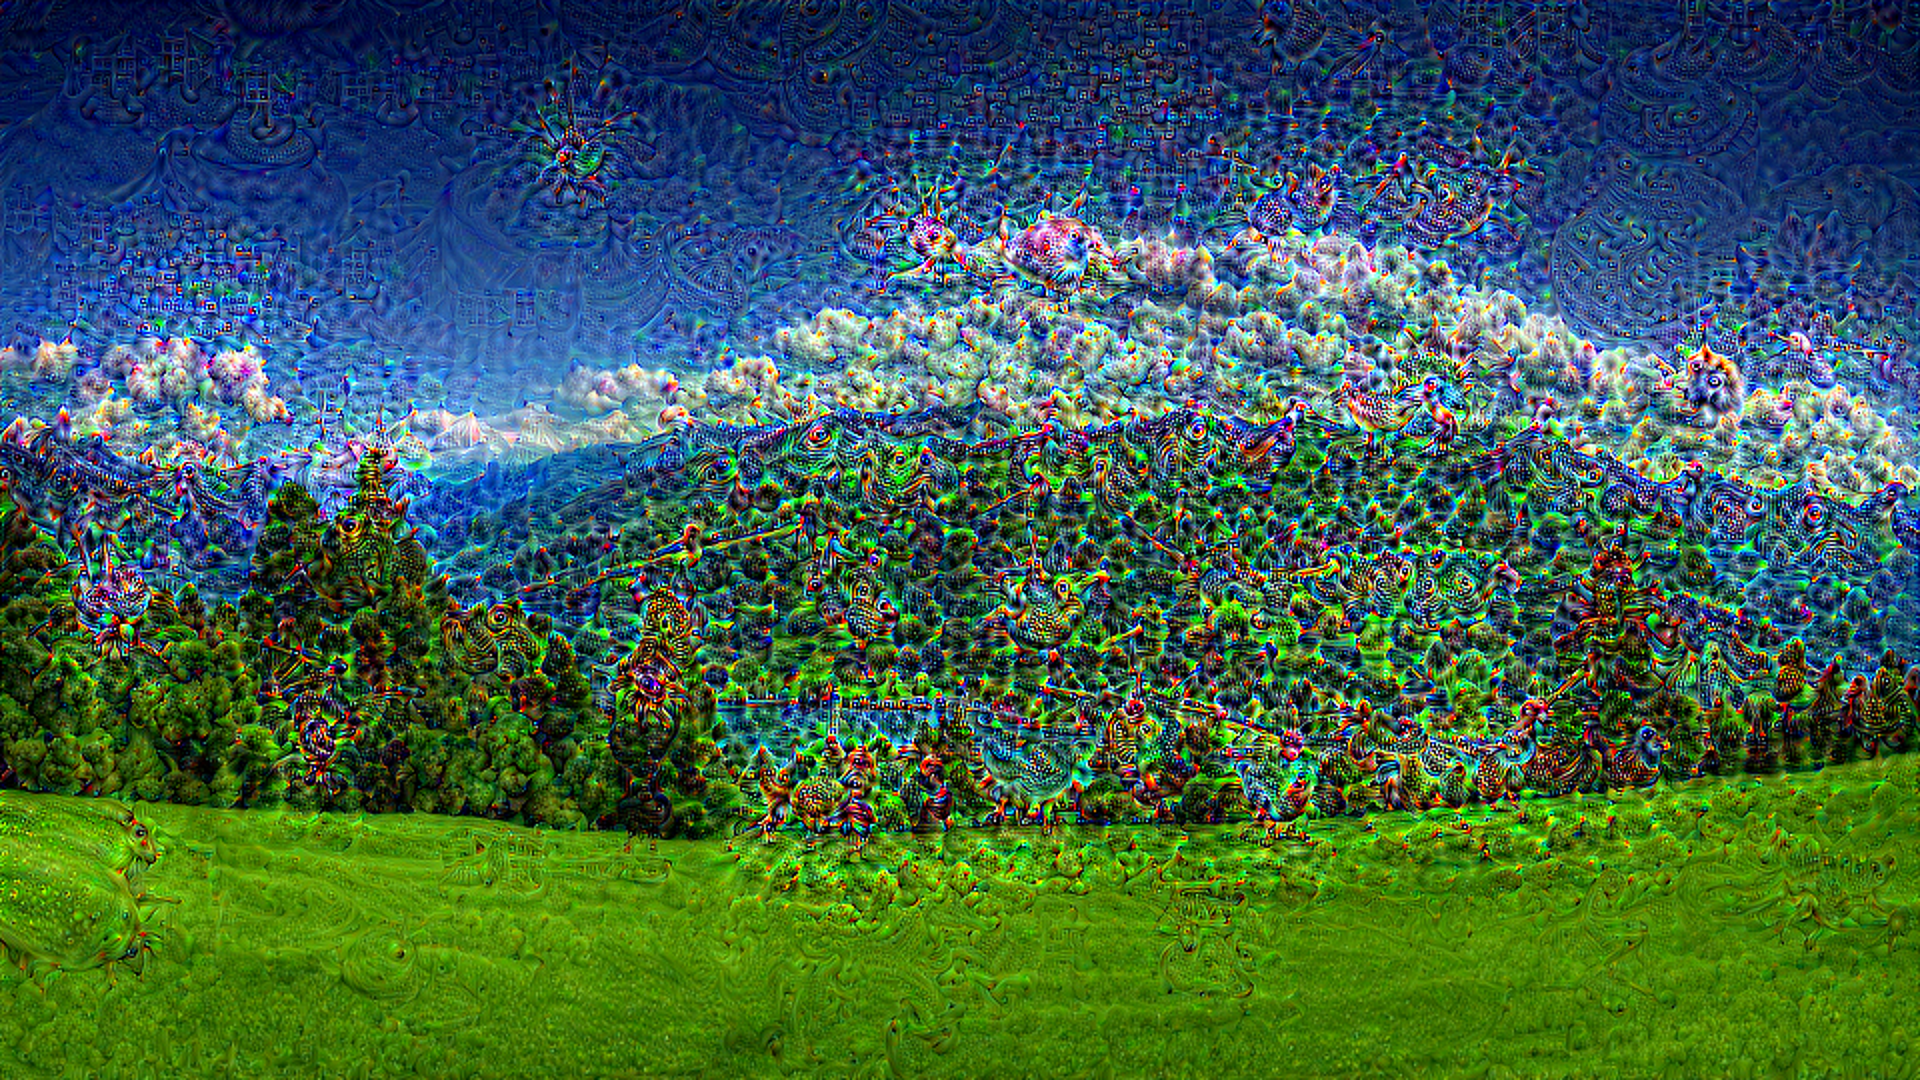

In [71]:
images = []
for i in range(40):
    img = dream(img,model,layer,1,1)
    images.append(img.resize(orig_size.astype(int)))
    img.resize(new_size.astype(int))
img.resize(orig_size.astype(int))
# img.resize((np.array(out_img.size)*2).astype(int))

In [72]:
im_ = Image.new('RGB', (img.size[0]*2, img.size[1]*2), (0, 0, 0))
im_.save('images/dream_1.gif',save_all=True, append_images=images, optimize=False, duration=160, loop=0)

In [73]:
img.show()